# 문제 1. KNN 실습

* 아래의 코드를 사용해 이번 문제에서 사용할 데이터 셋을 불러와주세요.

In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [152]:
import seaborn as sns

df = sns.load_dataset('titanic')

In [153]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


 ### 1-1
 * 각 column의 결측치 개수를 확인하고, survived, pclass, sex, age, sibsp,parch 열만을 남기고 남은열들을 모두 삭제해주세요.

In [154]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [155]:
df = df[['survived', 'pclass', 'sex', 'age', 'sibsp','parch']]
df

,survived,pclass,sex,age,sibsp,parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0
...,...,...,...,...,...,...
886,0,2,male,27.0,0,0
887,1,1,female,19.0,0,0
888,0,3,female,NaN,1,2
889,1,1,male,26.0,0,0


### 1-2
* age열의 데이터가 존재하지 않는 행을 모두 삭제해주세요.  
* one_hot_encoding을 사용해 sex열의 데이터를 숫자형으로 변환하고, 변환이 끝나면 기존의 sex열을 삭제해주세요.

In [156]:
df = df.dropna(subset = ['age'])
df = df.reset_index(drop = True)

In [157]:
df['age'].isnull().sum()

0

In [158]:
from sklearn.preprocessing import OneHotEncoder

o_encoder = OneHotEncoder(sparse = False)
oh = o_encoder.fit_transform(df[['sex']])
oh = pd.DataFrame(oh)
oh.columns = ['female', 'male']
df = pd.concat([df, oh], axis = 1)
df = df.drop('sex', axis = 1)
df.head()

,survived,pclass,age,sibsp,parch,female,male
0,0,3,22.0,1,0,0.0,1.0
1,1,1,38.0,1,0,1.0,0.0
2,1,3,26.0,0,0,1.0,0.0
3,1,1,35.0,1,0,1.0,0.0
4,0,3,35.0,0,0,0.0,1.0


### 1-3
* X = df[['pclass', 'age', 'sibsp', 'parch', 'female', 'male']]
* Y = df['survived']
* 위의 코드를 실행하고, X를 StandardScaler를 사용해 정규화해주세요.

In [161]:
X = df[['pclass', 'age', 'sibsp', 'parch', 'female', 'male']]
Y = df['survived']

In [162]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

X_scaled_df = pd.DataFrame(X_scaled, columns = X.columns)
X_scaled_df.head()

,pclass,age,sibsp,parch,female,male
0,0.911232,-0.530377,0.524570,-0.505895,-0.759051,0.759051
1,-1.476364,0.571831,0.524570,-0.505895,1.317434,-1.317434
2,0.911232,-0.254825,-0.551703,-0.505895,1.317434,-1.317434
3,-1.476364,0.365167,0.524570,-0.505895,1.317434,-1.317434
4,0.911232,0.365167,-0.551703,-0.505895,-0.759051,0.759051


### 1-4
* 테스트 데이터의 비율은 30%로 하고, 학습 데이터는 train, 테스트 데이터는 test로 저장해주세요. 이 때 데이터 분할 시 랜덤 난수 임의값을 10으로 지정해주세요.
* k를 찾는 과정을 실행해주세요.

In [163]:
#train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, Y, test_size = 0.3, random_state = 10)

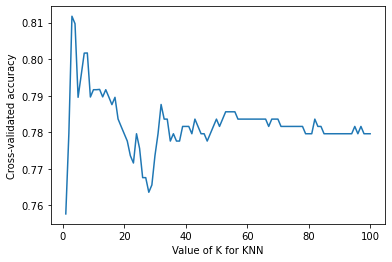

In [170]:
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

# 1부터 100까지의 K 중 10겹교차검증을 통해 KNN 알고리즘의 성능을 가장 좋게하는 K를 찾는 과정입니다.
k_range= np.arange(1,101)
k_scores = []

for k in k_range:
    model = KNeighborsClassifier(k)
    scores = cross_val_score(model, X_train,y_train, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())

#코드를 완성하시오.
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-validated accuracy')
plt.show()

In [171]:
result = pd.DataFrame()
result['k'] = k_range
result['accuracy'] = k_scores
result = result.sort_values(by = 'accuracy', ascending = False).reset_index(drop = True)
result.head()

,k,accuracy
0,3,0.811714
1,4,0.809673
2,8,0.801673
3,7,0.801633
4,6,0.795551


In [172]:
k = result['k'][0]
print('k = {}'.format(k))

k = 3


### 1-5 
* 2.4에서 얻은 k를 하이퍼파라미터로 하는 KNN 알고리즘을 사용해 Survived의 값을 예측하고, accuracy_score를 사용해 모델의 평가해주세요.

In [175]:
from sklearn import neighbors
classifier = neighbors.KNeighborsClassifier(k)
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)

In [176]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, pred))

0.8093023255813954


# 문제 2. SVM 실습

사용할 breast cancer 데이터는 유방암 진단을 위한 데이터셋으로 30개의 속성과 malignant(악성), benign(양성)의 두가지 타겟값을 가지고 있습니다. 
 
30개의 독립변수를 통해 유방암을 예측하는 SVM 모델을 만들 예정입니다. 

### 2-1. 유방암 데이터 불러오기

In [ ]:
import pandas as pd
from sklearn import datasets

datasets=datasets.load_breast_cancer()

df=pd.DataFrame(data=datasets.data, columns=datasets.feature_names)

df['target'] = datasets.target


print(df.info())
df.head()

### 2-2. 데이터 탐색
데이터에 대해 다음 특성을 탐색해보세요.
- 데이터 형태 확인 (shape)
- 'target' 변수의 범주(0 or 1)별 개수 확인 (value_counts)
- 열별 결측값 확인 (isna)

### 2-3.  선형분리/비선형분리 선택하기
선형분리 중 linear와 비선형분리 중 rbf를 선택했습니다.

아래 코드를 실행한 후, 둘 중 무엇이 좋을지, 그 이유는 무엇일지 적어주세요.
* hint: cross validation, kernel, linear, rbf

In [ ]:
import sklearn.svm as svm
import sklearn.metrics as mt
import sklearn.model_selection as ms
from sklearn.model_selection import cross_val_score, cross_validate

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [ ]:
# 선형분리 진행
svm_clf_l =svm.SVC(kernel = 'linear')

# 교차검증
scores_l = cross_val_score(svm_clf_l, X, y, cv = 5)
scores_l

print('교차검증 평균: ', scores_l.mean())

In [ ]:
# 비선형분리 진행
svm_clf_r =svm.SVC(kernel = 'rbf')

# 교차검증
scores = cross_val_score(svm_clf_r, X, y, cv = 5)
scores

print('교차검증 평균: ', scores.mean())

무엇이 좋을까요?: 
이유:

### 2-4. 데이터 나누기
데이터를 학습 데이터와 테스트 데이터로 나누세요.

- 테스트 데이터의 비율은 20%로 하고, 학습 데이터는 train, 테스트 데이터는 test로 저장해주세요! 

- 데이터 분할 시 랜덤 난수 임의값을 100으로 지정해주세요.

* hint: sklearn, train_test_split, random_state

### 2-5 하이퍼파라미터 구하고 SVM 적용하기
3-3에서 정한 방법에 필요한 파라미터값을 구해준 후, 구한 파라미터로 학습된 모델을 clf에 저장하는 과정입니다.

1.선형분리를 택했다면 c 튜닝

2.비선형분리를 택했다면 c와 gamma 튜닝 

1번과 2번 중 하나를 선택하고, 해당하는 과정에서 빠진 부분을 채운 후 실행해주세요. 

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

#빠진 부분을 채우고 실행하세요. 
#hint: train data를 X_train, y_train으로 나누는 것을 잊지 말아주세요.



In [ ]:
#1번 선형을 선택한 경우 빠진 부분을 채우고 실행하세요.


def svc_param_selection(X,y,nfolds):
    svm_parameters = [
                        {'kernel': [''],
                         'C': [0.01, 0.1, 1, 10, 100, 1000]
                        }
                       ]
    clf = GridSearchCV(SVC(), svm_parameters, cv=10)
    clf.fit(X_train, y_train)
    print(clf.best_params_)
    
    return clf

In [ ]:
#2번 비선형을 선택한 경우 빠진 부분을 채우고 실행하세요.


def svc_param_selection(X,y,nfolds):
    svm_parameters = [
                        {'kernel': [''],
                         'C': [0.01, 0.1, 1, 10, 100, 1000],
                         'gamma': [0.00001,0.0001, 0.001, 0.01, 0.1, 1],
                        }
                       ]
    clf = GridSearchCV(SVC(), svm_parameters, cv=10)
    clf.fit(X_train, y_train)
    print(clf.best_params_)
    
    return clf

In [ ]:
clf = svc_param_selection(X_train, y_train, 10) 

In [ ]:
#clf로 저장한 모델의 train 정확도를 확인하는 코드입니다. 실행하세요. 
result = pd.DataFrame(clf.cv_results_['params'])
result['mean_test_score'] = clf.cv_results_['mean_test_score']
result.sort_values(by='mean_test_score', ascending=False)

### 2-6. 테스트 
최적의 파라미터로 학습된 clf를 이용하여,
테스트를 진행해봅시다.

테스트 결과 정확도는 어떻게 나왔나요?

In [ ]:
#test data를 X_test, y_test으로 나누는 것을 잊지 말아주세요.


In [ ]:
정확도:

## 3. SVM 성능 개선하기
발표에서도 언급했듯이 SVM 모델은 "______"에 민감하기 때문에
전처리에서 이 과정을 꼭 거쳐야 합니다.
위에서 빼먹은 이 과정은 무엇일까요?

답: